# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("orders.csv")

In [81]:
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [82]:
df['order_value'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64

In [83]:
df[df['order_value'] < 704000]['order_value'].describe()

count      4983.000000
mean        754.091913
std        5314.092293
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      154350.000000
Name: order_value, dtype: float64

In [84]:
df[df['order_value'] == 704000]

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


It appears that there are a few outliers in the order value that is skewing the AOV to an extremely high value. There are 17 orders that have an extremely high order value of 704,000 dollars which is making the AOV absurdly high. After neglecting the outliers, we can see that the AOV has reduced to 754 dollars which is a more reasonable amount. Unfortunately, we cannot neglect these outliers from the dataset. 

A better metric to reflect customer behavior would be average item value (AIV) which is the average of the total order value divided by total items ordered of all orders over the 30 day window. 

In [85]:
(df['order_value']/df['total_items']).describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
dtype: float64

Here we see the AIV is 387.74, a number much lower than the 3145.12 AOV which takes into account the outliers in order value. This also makes sense as the shoe prices tend to average around those values. The minimum price of a shoe bought is 90.00 and the maximum price is 25725.00. More details are in the table above that tells us more about the item values.

In [86]:
df['item_value'] = df['order_value']/df['total_items']

In [87]:
df2 = pd.DataFrame()
df[["date","time"]] = df['created_at'].str.split(" ", expand = True)
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,item_value,date,time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,2017-03-14,4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,2017-03-26,12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,2017-03-01,4:35:11


To create visualizations and study customer behavior, I'm going to create 6 equally spaced time bins, each of 4 hours, and create a new column in the dataframe that reflects the time bin in which the order was placed. 

In [88]:
df.time = pd.to_datetime(df.time)
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['12 am - 4 am', '4 am - 8 am', '8 am - 12pm', '12 pm -  4pm', '4pm - 8pm', '8pm - 12pm']
res = pd.cut(df.time.dt.hour, bins, labels=labels, right=False)
df['time_bin'] = res

In [89]:
df2 = df.groupby('time_bin')

In [90]:
df2.mean()

/var/folders/y_/g5kgbm652777l624rqgrw5v00000gn/T/ipykernel_41870/3587575296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.mean()


,order_id,shop_id,user_id,order_value,total_items,item_value
time_bin,,,,,,
12 am - 4 am,2522.434833,50.374856,850.663206,563.763552,1.985006,269.211073
4 am - 8 am,2427.940968,50.419126,844.245573,15128.172373,42.148760,457.089728
8 am - 12pm,2512.406699,49.491627,852.718900,763.812201,2.002392,366.193780
12 pm - 4pm,2506.509852,50.805419,851.928571,673.752463,1.958128,372.322660
4pm - 8pm,2550.859848,50.592172,847.958333,656.234848,1.978535,410.152778
8pm - 12pm,2485.985816,48.836879,847.091017,848.608747,1.990544,454.903073


In [91]:
df2["item_value"].mean()

time_bin
12 am - 4 am    269.211073
4 am - 8 am     457.089728
8 am - 12pm     366.193780
12 pm -  4pm    372.322660
4pm - 8pm       410.152778
8pm - 12pm      454.903073
Name: item_value, dtype: float64

Text(0.5, 1.0, 'Average item value ordered in each time bin')

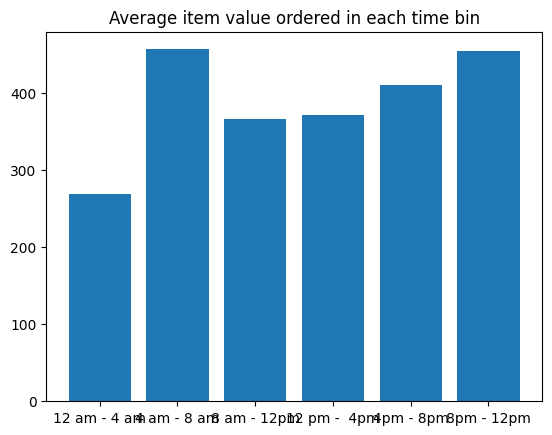

In [92]:
plt.bar(labels, df2['item_value'].mean())
plt.title("Average item value ordered in each time bin")

The more expensive shoes are purchased at 4am - 8am and from 8pm - 12pm, which tends to be the times when people are not at work. The 12 am - 4am crowd has the lowest average item value for a time bin.

Text(0.5, 1.0, 'Most commonly used payment method in each time bin')

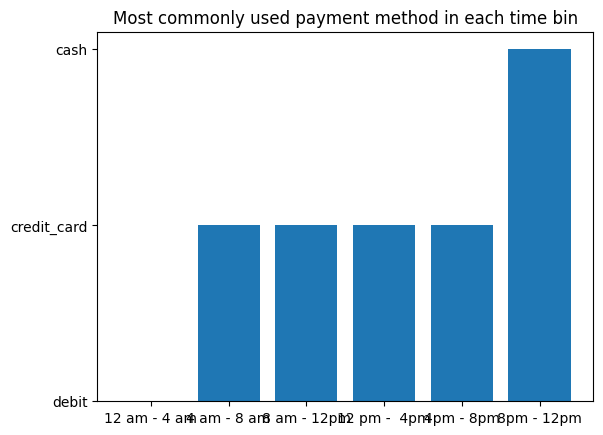

In [93]:
plt.bar(labels, df2['payment_method'].agg(pd.Series.mode))
plt.title("Most commonly used payment method in each time bin")

It is clear from the graph above that credit card is the most commonly used form of payment during the day. At night, from 8pm to 12pm cash is used the most, whereas from 12 am - 4 am, debit cards are used most frequently.

Text(0.5, 1.0, 'Average number of items ordered in each time bin')

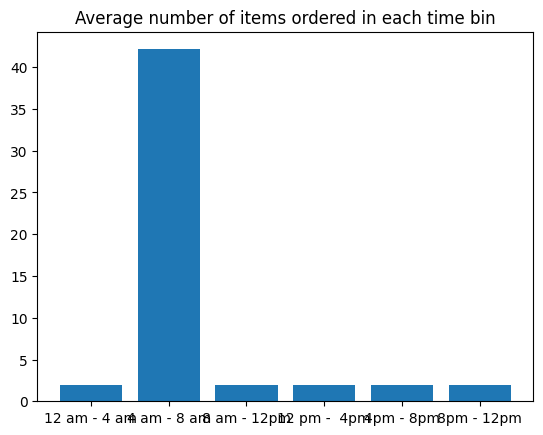

In [94]:
plt.bar(labels, df2['total_items'].mean())
plt.title("Average number of items ordered in each time bin")

We need to note that the average items ordered is unusually high due to a large order taken in that time bin. We could use that information to infer that the 4am - 8am time period has large orders.

In [95]:
days = np.sort(df.date.unique())
days

array(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04',
       '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08',
       '2017-03-09', '2017-03-10', '2017-03-11', '2017-03-12',
       '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
       '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20',
       '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
       '2017-03-25', '2017-03-26', '2017-03-27', '2017-03-28',
       '2017-03-29', '2017-03-30'], dtype=object)

Text(0.5, 1.0, 'Average item value ordered in each day')

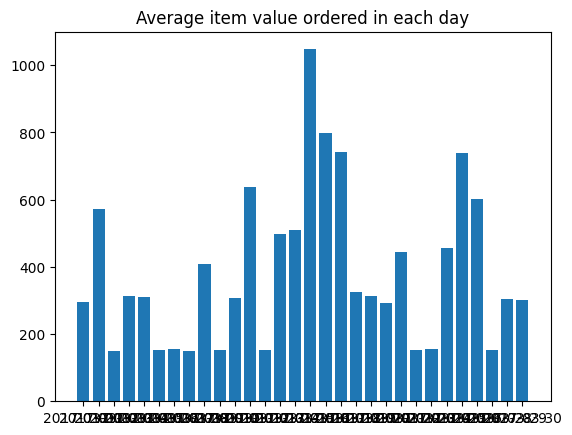

In [96]:
plt.bar(days, df.groupby("date")['item_value'].mean())
plt.title("Average item value ordered in each day")

Although it is not very clear, we can see that more expensive shoes are ordered in the middle of the month and the lesser expensive shoes during in the first few and last few days. Also, it seems that every 7-10 days the average item value increases sharply.

Text(0.5, 1.0, 'Most common payment method in each day')

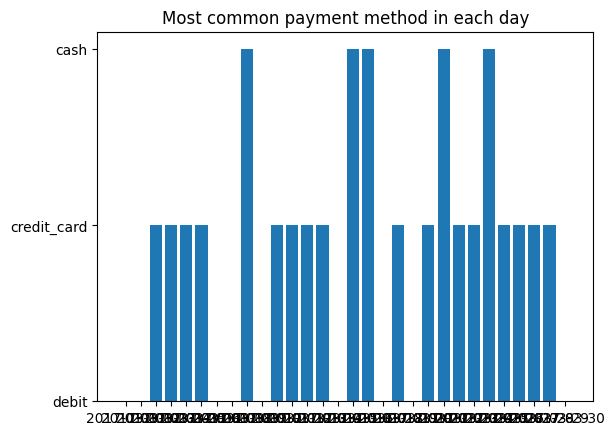

In [97]:
plt.bar(days, df.groupby("date")['payment_method'].agg(pd.Series.mode))
plt.title("Most common payment method in each day")

The most common payment method most days is credit card. Debit card is used more often than cash.

Text(0.5, 1.0, 'Average number of items ordered in each day')

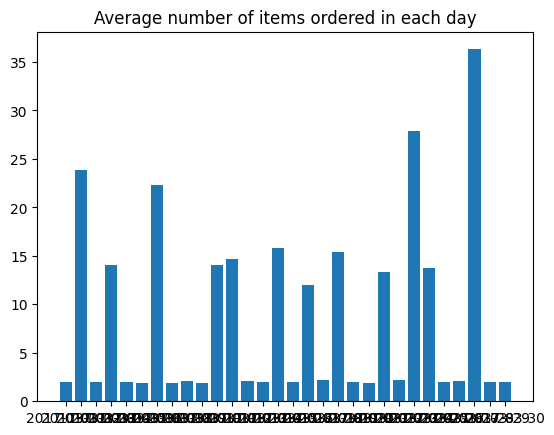

In [98]:
plt.bar(days, df.groupby("date")['total_items'].mean())
plt.title("Average number of items ordered in each day")

This data is hard to decipher from the graph alone and requires more analysis.